# Exploratory Data Analysis - Ride Completion Prediction

## 1. Introduction
This notebook contains the exploratory data analysis (EDA) for the ride completion prediction task. The main focus is on analyzing the training dataset to understand its structure and relationships. A small section at the end performs basic checks on the test dataset.

## 2. EDA on Training Data

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
%matplotlib inline
sns.set(style="whitegrid")

In [53]:
# Load the training dataset
train_df = pd.read_csv('data/task_train.csv')

# Drop unnecessary columns
train_df = train_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Display basic information about the dataset
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           8500 non-null   int64 
 1   UserID       8500 non-null   int64 
 2   Origin       8500 non-null   int64 
 3   Destination  8500 non-null   int64 
 4   Time         8500 non-null   int64 
 5   Income       8500 non-null   int64 
 6   Comment      8500 non-null   object
 7   Created_at   8500 non-null   object
 8   Label        8500 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 597.8+ KB


,ID,UserID,Origin,Destination,Time,Income,Comment,Created_at,Label
0,1001034,1001513,1030,1030,9,230000,\n,2024-04-13 10:07:38.022905,0
1,1005544,1001129,631,847,42,1060000,راننده بسیار مودب بود و خوشرو بود\n,2024-04-15 12:15:10.609723,0
2,1000139,1004333,858,864,34,1250000,سفر بسیار اسان و راحتی بود، و ماشین تمیزتمیز ...,2024-04-13 02:18:36.600126,0
3,1000560,1001673,593,846,14,660000,راننده به موقع رسید\n,2024-04-13 06:00:18.870376,1
4,1008230,1002231,1018,1018,11,230000,ماشین بسیار شیک بود و راننده از هر لحاظ حرفه...,2024-04-16 16:31:47.874442,0


In [54]:
# Display summary statistics
train_df.describe()

,ID,UserID,Origin,Destination,Time,Income,Label
count,8.500000e+03,8.500000e+03,8500.000000,8500.00000,8500.000000,8.500000e+03,8500.000000
mean,1.004248e+06,1.002552e+06,749.559176,762.52200,22.359294,7.409165e+05,0.022235
std,2.454345e+03,1.387823e+03,159.116855,170.79744,16.700171,4.793542e+05,0.147457
min,1.000000e+06,1.000000e+06,579.000000,579.00000,0.000000,1.800000e+05,0.000000
25%,1.002124e+06,1.001292e+06,602.000000,594.00000,10.000000,3.700000e+05,0.000000
50%,1.004246e+06,1.002691e+06,634.000000,836.00000,18.000000,6.400000e+05,0.000000
75%,1.006371e+06,1.003815e+06,856.000000,861.00000,30.000000,9.900000e+05,0.000000
max,1.009690e+06,1.004635e+06,1122.000000,1122.00000,134.000000,3.800000e+06,1.000000


### 2.1. Missing Data Analysis

In [55]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### 2.2. Univariate Analysis

#### origin and destination

/var/folders/_v/41jjhnl13mbbj8tvqvcz7mpc0000gn/T/ipykernel_87485/339853452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Origin', data=train_df, palette='viridis')


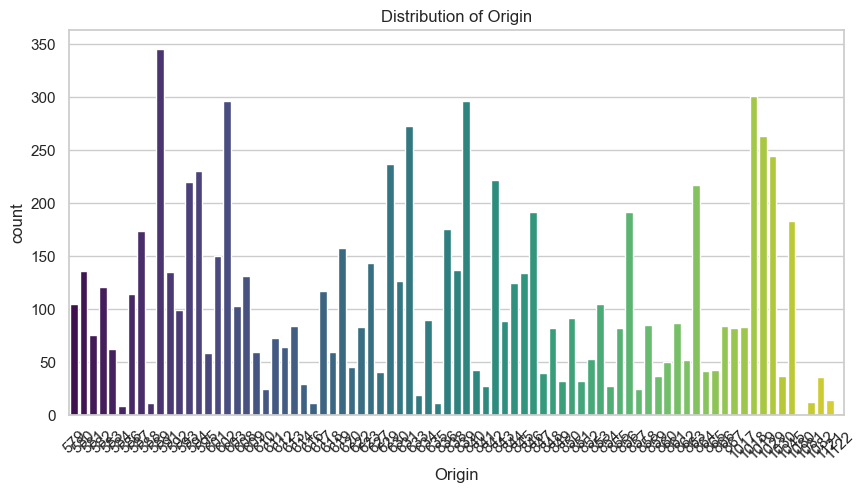

/var/folders/_v/41jjhnl13mbbj8tvqvcz7mpc0000gn/T/ipykernel_87485/339853452.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Destination', data=train_df, palette='viridis')


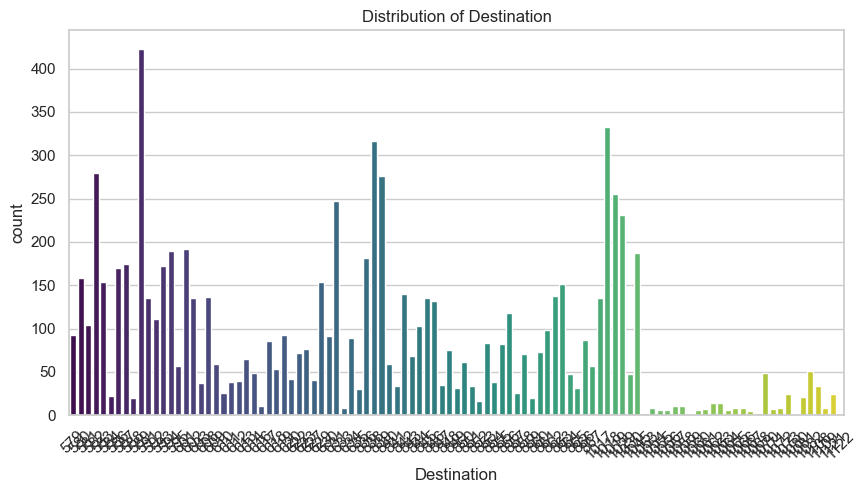

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for 'Origin'
plt.figure(figsize=(10, 5))
sns.countplot(x='Origin', data=train_df, palette='viridis')
plt.title('Distribution of Origin')
plt.xticks(rotation=45)
plt.show()

# Bar plot for 'Destination'
plt.figure(figsize=(10, 5))
sns.countplot(x='Destination', data=train_df, palette='viridis')
plt.title('Distribution of Destination')
plt.xticks(rotation=45)
plt.show()


#### Time

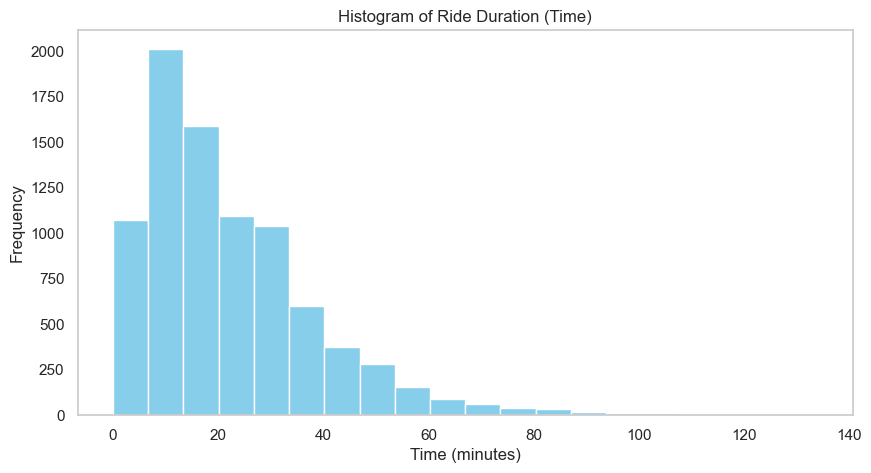

In [57]:
# Histogram for 'Time'
plt.figure(figsize=(10, 5))
train_df['Time'].hist(bins=20, color='skyblue', grid=False)
plt.title('Histogram of Ride Duration (Time)')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()


#### Income

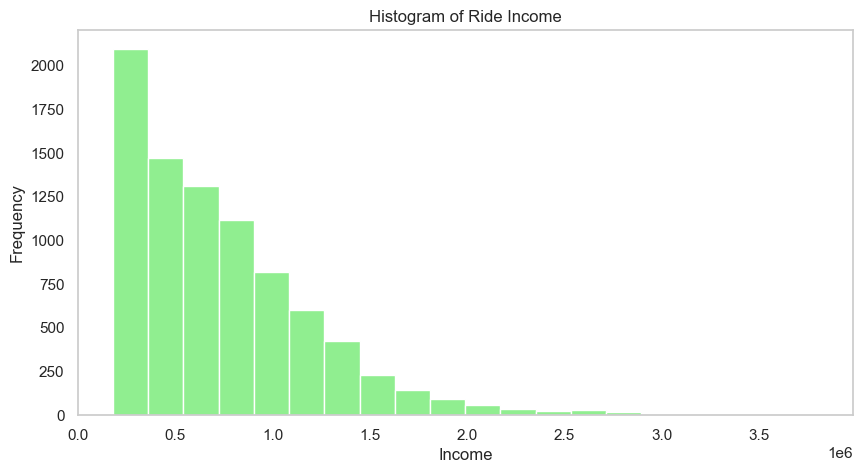

In [58]:
# Histogram for 'Income'
plt.figure(figsize=(10, 5))
train_df['Income'].hist(bins=20, color='lightgreen', grid=False)
plt.title('Histogram of Ride Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


####  Created_at


In [59]:
# Convert 'Created_at' to datetime
train_df['Created_at'] = pd.to_datetime(train_df['Created_at'])

# Extract hour and day of week
train_df['Hour'] = train_df['Created_at'].dt.hour
train_df['DayOfWeek'] = train_df['Created_at'].dt.day_name()


/var/folders/_v/41jjhnl13mbbj8tvqvcz7mpc0000gn/T/ipykernel_87485/3157907982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=train_df, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


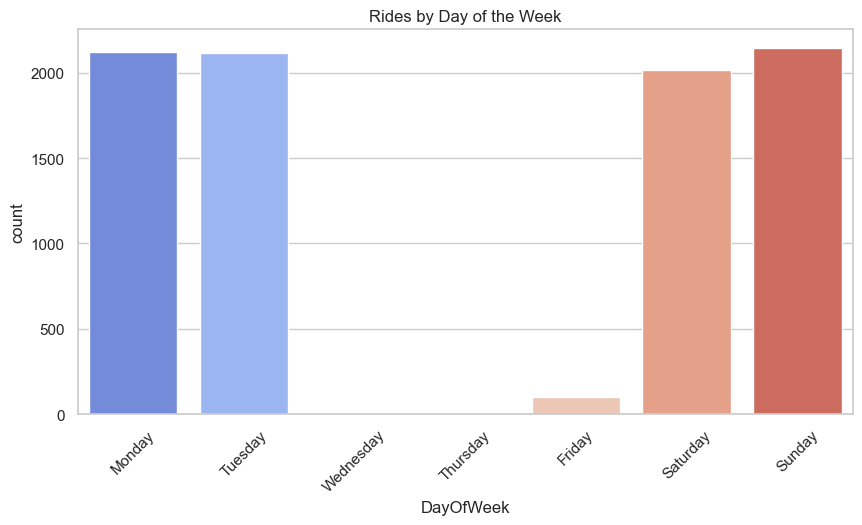

In [60]:
# Bar plot for rides by day of the week
plt.figure(figsize=(10, 5))
sns.countplot(x='DayOfWeek', data=train_df, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Rides by Day of the Week')
plt.xticks(rotation=45)
plt.show()


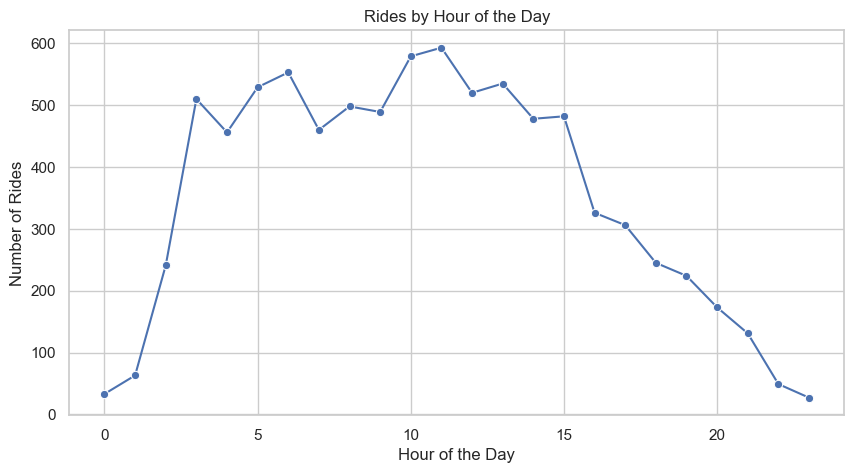

In [61]:
# Count the number of rides for each hour
hourly_counts = train_df['Hour'].value_counts().sort_index()

# Plot the number of rides by hour of the day
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()


#### Label

/var/folders/_v/41jjhnl13mbbj8tvqvcz7mpc0000gn/T/ipykernel_87485/1984416211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train_df, palette='viridis')


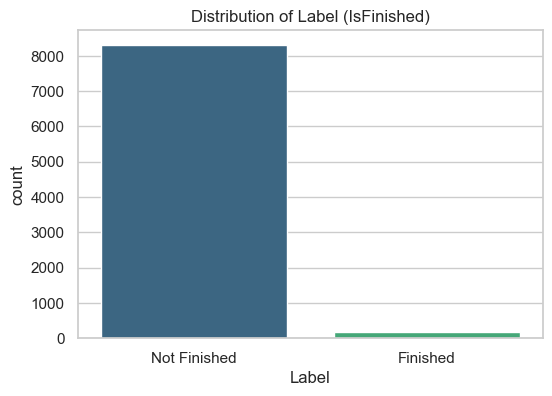

In [62]:
# Bar plot for 'Label'
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=train_df, palette='viridis')
plt.title('Distribution of Label (IsFinished)')
plt.xticks([0, 1], ['Not Finished', 'Finished'])
plt.show()


### 2.3. Bivariate Analysis

#### 2.3.1 Identify Valid Feature Pairs


In [63]:
# List of valid feature pairs for each type of bivariate analysis

# Numerical vs. Numerical
numerical_pairs = [('Time', 'Income')]

# Categorical vs. Numerical
categorical_numerical_pairs = [
    ('Label', 'Time'),
    ('Label', 'Income'),
    ('Origin', 'Income'),
    ('Destination', 'Income')
]

# Categorical vs. Categorical
categorical_pairs = [
    ('Label', 'Origin'),
    ('Label', 'Destination')
]

# Numerical vs. Datetime
datetime_numerical_pairs = [('Hour', 'Income')]


#### 2.3.2 Create Functions for Plotting

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot function for Numerical vs. Numerical
def scatter_plot(x, y, df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'{x} vs. {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Box plot function for Categorical vs. Numerical
def box_plot(x, y, df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=df)
    plt.title(f'{y} vs. {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Violin plot function for Categorical vs. Numerical
def violin_plot(x, y, df):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=x, y=y, data=df, palette='muted')
    plt.title(f'{y} vs. {x} (Violin Plot)')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Count plot function for Categorical vs. Categorical
def count_plot(x, hue, df):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=x, hue=hue, data=df, palette='viridis')
    plt.title(f'{x} vs. {hue}')
    plt.xticks(rotation=45)
    plt.show()

# Line plot function for Numerical vs. Datetime
def line_plot(x, y, df):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=x, y=y, marker='o', data=df)
    plt.title(f'{y.name} over {x.name}')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()


#### 2.3.3 Perform the Bivariate Analysis Using the Functions

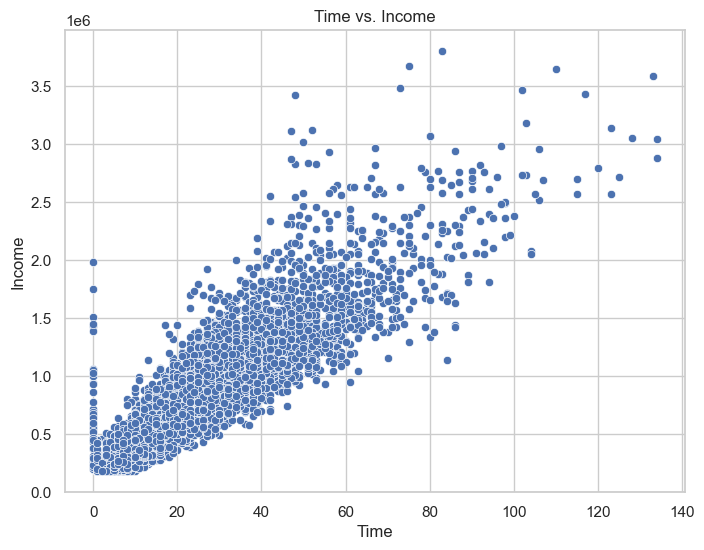

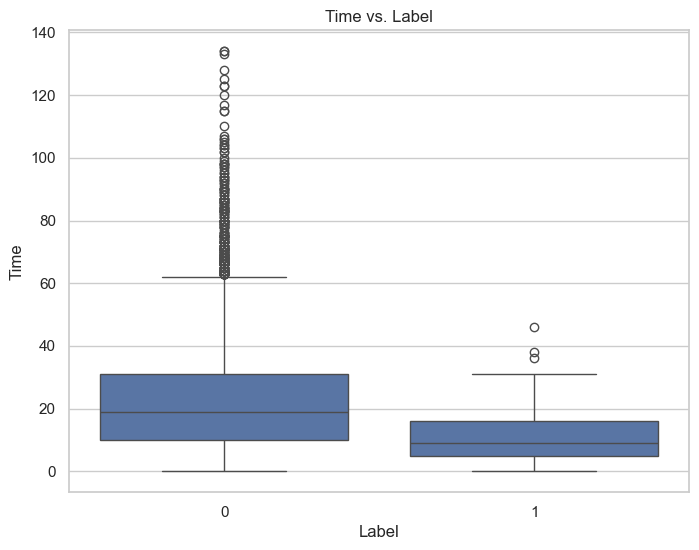

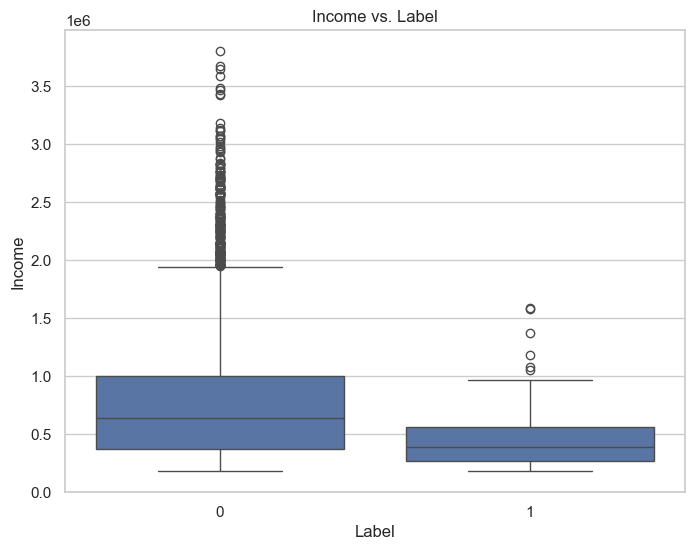

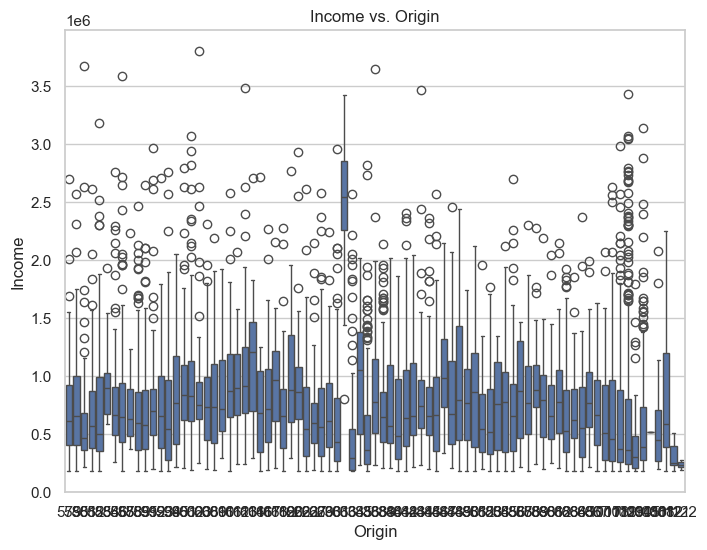

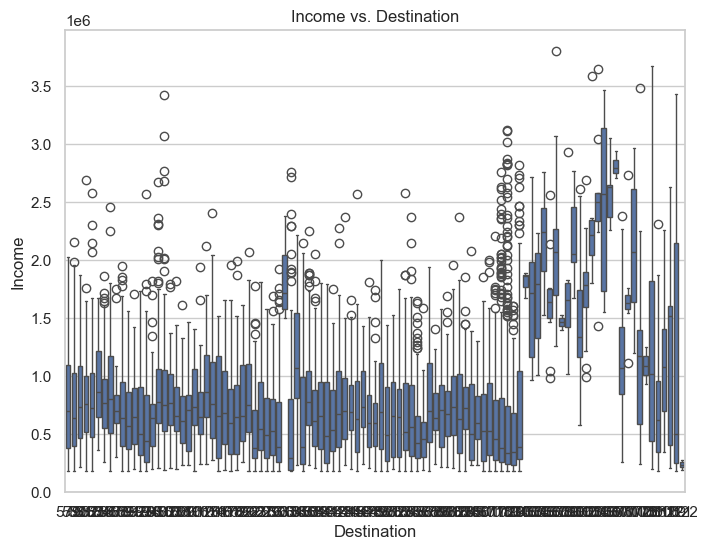

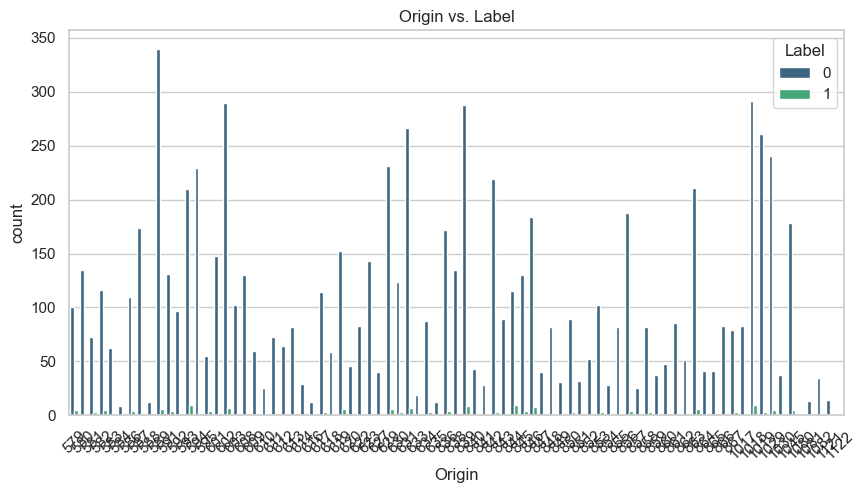

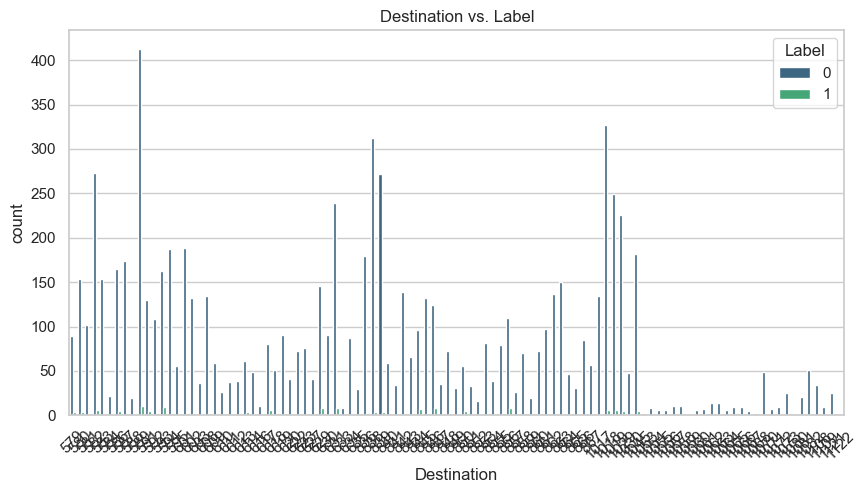

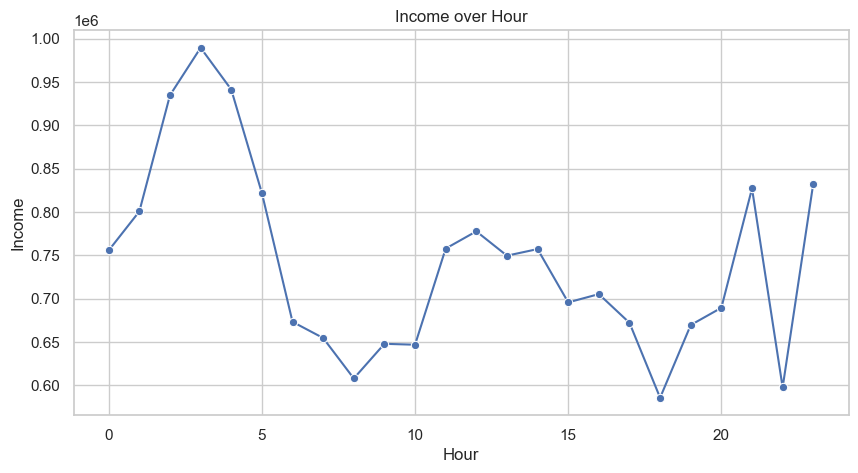

In [65]:
# Apply scatter plot for Numerical vs. Numerical pairs
for x, y in numerical_pairs:
    scatter_plot(x, y, train_df)

# Apply box plot for Categorical vs. Numerical pairs
for x, y in categorical_numerical_pairs:
    box_plot(x, y, train_df)

# Apply count plot for Categorical vs. Categorical pairs
for x, y in categorical_pairs:
    count_plot(y, x, train_df)

# Apply line plot for Numerical vs. Datetime pairs
for x, y in datetime_numerical_pairs:
    hourly_data = train_df.groupby(x)[y].mean().reset_index()
    line_plot(hourly_data[x], hourly_data[y], hourly_data)


### 2.4. Multivariate Analysis

/Users/fatemehs.hashemig/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


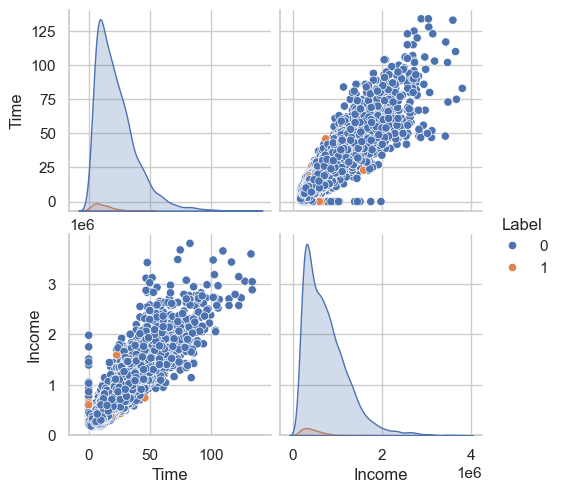

In [66]:
# Pair plot for selected features
sns.pairplot(train_df, hue='Label', vars=['Time', 'Income'])
plt.show()

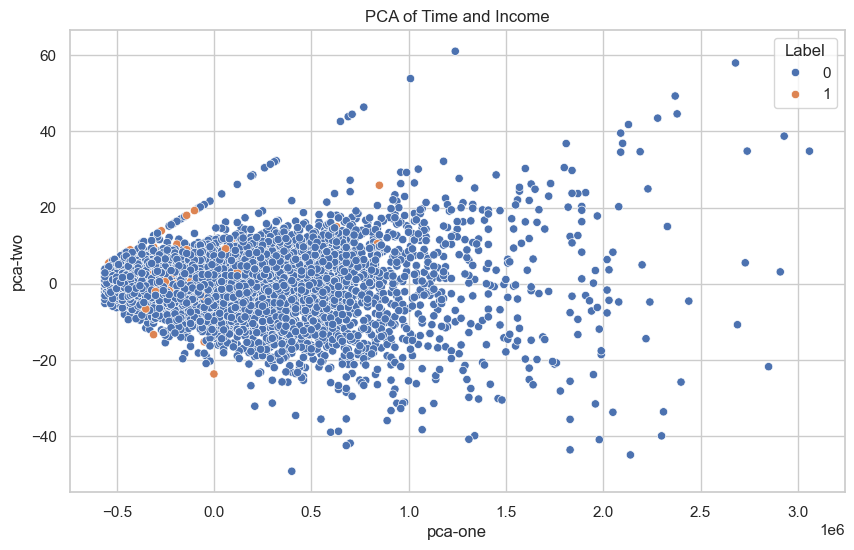

In [67]:
from sklearn.decomposition import PCA

# Applying PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_df[['Time', 'Income']])
train_df['pca-one'] = pca_result[:,0]
train_df['pca-two'] = pca_result[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='pca-one', y='pca-two', hue='Label', data=train_df)
plt.title('PCA of Time and Income')
plt.show()

### 2.5. Outlier Detection

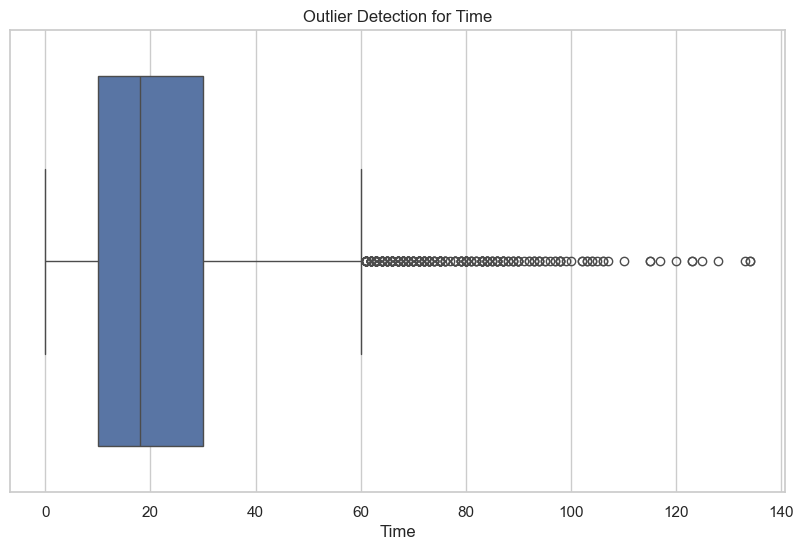

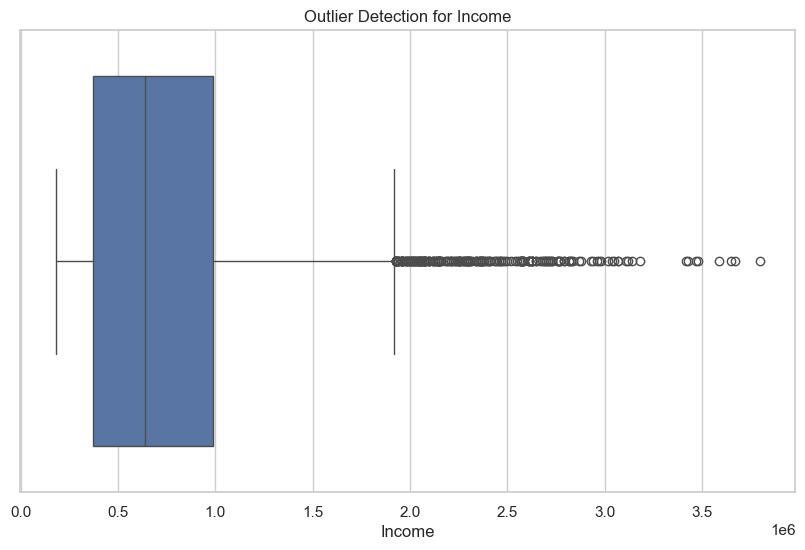

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Time'
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Time'])
plt.title('Outlier Detection for Time')
plt.show()

# Box plot for 'Income'
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Income'])
plt.title('Outlier Detection for Income')
plt.show()


# 3. Feature Engineering Summary and Next Steps

## 1. Relationship Between Time and Income
- **Observation (Bivariate):** Generally, as `Time` (ride duration) increases, `Income` also increases, which is expected. However, there are some cases where short rides generate unexpectedly high incomes.
- **Feature Engineering Ideas:** 
  - **Time Buckets:** It might be useful to group `Time` into categories (e.g., short, medium, long rides) to capture these patterns more effectively.
  - **Flagging High-Income Short Rides:** Creating a flag for rides that are short but have high incomes could help identify unique cases or outliers.

## 2. Ride Completion and Duration
- **Observation (Bivariate):** Unfinished rides tend to be shorter, as shown in the box plots. This suggests that shorter rides are less likely to be completed.
- **Feature Engineering Ideas:**
  - **Duration Categories:** We could create categories for ride durations to highlight this relationship more clearly.
  - **Interaction with Label:** It might also be beneficial to create an interaction feature between `Time` and `Label` to emphasize how ride duration impacts the likelihood of completion.

## 3. Ride Completion and Income
- **Observation (Bivariate):** Similarly, unfinished rides usually have lower incomes. This suggests that higher-income rides are more likely to be completed, perhaps due to the greater incentive for both parties.
- **Feature Engineering Ideas:**
  - **Income Per Minute:** A derived feature that calculates `Income` per minute could provide insight into ride efficiency or profitability.
  - **Income Categories:** Just like with `Time`, categorizing `Income` into bins (low, medium, high) might help the model better capture its impact on ride completion.

## 4. Impact of Origins and Destinations
- **Observation (Bivariate):** There are certain origins and destinations that have no unfinished rides, suggesting these might be more reliable or popular locations.
- **Feature Engineering Ideas:**
  - **Reliable Location Flags:** Creating binary features to indicate whether a ride starts or ends at one of these reliable locations could be useful.
  - **Origin-Destination Interactions:** Considering interactions between `Origin` and `Destination` might help capture pairs of locations that are more likely to result in a completed ride.

## 5. Hour of the Day and Income
- **Observation (Bivariate):** Certain hours of the day show higher incomes, suggesting that ride profitability may vary depending on the time of day.
- **Feature Engineering Ideas:**
  - **Time of Day Feature:** Introducing a feature for the hour of the day (or grouping hours into broader time blocks) might capture this variation.
  - **Income by Hour Interaction:** An interaction between `Hour` and `Income` could further highlight these time-of-day effects.

## 6. Multivariate Insights

### 6.1 Pair Plot (Time, Income, Label)
- **Observation:** The pair plot confirms a strong positive relationship between `Time` and `Income`. However, distinguishing between finished and unfinished rides based solely on these two features is challenging.
- **Feature Engineering Ideas:**
  - **Interaction Features:** Consider creating interaction features between `Time`, `Income`, and `Label` to better capture the nuanced relationships.
  - **Non-Linear Features:** It might be worthwhile to explore non-linear transformations of `Time` and `Income` to improve the model's ability to differentiate between finished and unfinished rides.

### 6.2 PCA (Time, Income, Label)
- **Observation:** PCA analysis shows significant overlap between finished and unfinished rides in the reduced dimensions, indicating that `Time` and `Income` alone may not provide enough information for a clear distinction.
- **Feature Engineering Ideas:**
  - **Additional Features:** Incorporating other features like `Origin`, `Destination`, and `Hour of the Day` could provide more context and improve the model’s ability to separate classes.
  - **Complex Models:** It might also be necessary to use more complex models that can handle non-linear relationships and interactions, such as tree-based models or neural networks.

## 7. Outlier Detection

### 7.1 Identifying Outliers in Time and Income
- **Observation:** The box plot shows that there are significant outliers in both `Time` and `Income`.
- **Feature Engineering Ideas:**
  - **Capping or Removing Outliers:** Consider capping extreme outliers in `Income` and `Time` to reduce their impact on the model, or alternatively, remove them if they represent data errors.
  - **Log Transformation:** Applying a log transformation to `Income` may help mitigate the effect of the outliers and normalize the distribution.
  - **Outlier Flags:** Introduce binary features that flag these outliers. This can help the model recognize these exceptional cases explicitly.


## 4. Minimal Check on Test Data

In [79]:
# Load the test dataset
test_df = pd.read_csv('data/task_test.csv')

# Drop unnecessary columns
test_df = test_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'UserID'])

# Display basic information about the dataset
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Origin       1500 non-null   int64 
 1   Destination  1500 non-null   int64 
 2   Time         1500 non-null   int64 
 3   Income       1500 non-null   int64 
 4   Comment      1500 non-null   object
 5   Created_at   1500 non-null   object
 6   Label        1500 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 82.2+ KB


,Origin,Destination,Time,Income,Comment,Created_at,Label
0,631,1068,76,3450000,قابل اعتماد و حرفهای\n,2024-04-13 03:18:20.374006,0
1,611,862,16,560000,عالی\n,2024-04-16 02:53:36.484247,0
2,1018,618,40,1140000,ضعیف\n,2024-04-13 09:43:47.217599,0
3,602,842,18,750000,خوب\n,2024-04-14 09:29:33.465792,0
4,589,602,33,760000,افتضاح\n,2024-04-16 15:59:35.316854,0


In [80]:
# Display summary statistics
test_df.describe()

,Origin,Destination,Time,Income,Label
count,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,750.144667,756.326000,22.059333,7.312800e+05,0.021333
std,158.813663,169.531607,15.920242,4.546008e+05,0.144541
min,579.000000,579.000000,0.000000,1.800000e+05,0.000000
25%,602.000000,594.000000,10.000000,3.800000e+05,0.000000
50%,632.000000,634.000000,18.000000,6.400000e+05,0.000000
75%,856.000000,858.250000,30.000000,9.800000e+05,0.000000
max,1121.000000,1121.000000,126.000000,3.450000e+06,1.000000


In [81]:
# Check for missing values in the test data
missing_values_test = test_df.isnull().sum()
missing_values_test[missing_values_test > 0]

Series([], dtype: int64)